<a href="https://colab.research.google.com/github/Kubania/Application-of-the-KNN-and-Naive-Bayes-Algorithms/blob/master/Moringa_Core_Week_9_IP_Mercy_Kubania_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Prediction in Patients

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

## 1. Defining the Question

### a) Specifying the Question



1.  Build a model that determines whether or not a passenger of the Titanic Ship survived based on the details given of the passengers







### b) Defining the Metric for Success

Build a model that is able to determine if a passenger of the Titanic Ship was able to survive with an accuracy of above 75%


### c) Understanding the context


Research is based on the Titanic Ship Passengers and whether they were able to survive or not based on the details provided of the passengers

### d) Recording the Experimental Design




1.   Import Libraries
2.   Load the Dataset
3.   Data Cleaning
4.   EDA
5.   Modelling
6.   Evaluation of the Models



## 2. Reading the Data

In [1]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/train (5).csv')
#test = pd.read_csv('/content/test (1).csv')

## 3. Checking the Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. Tidying the Dataset

In [6]:
# Check for null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
# Deal with missing values

mean = train['Age'].groupby(train['Pclass']).mean()

train['Age'] = train['Age'].groupby(train['Pclass']).transform(lambda x: x.fillna(x.mean()))

In [9]:
# Replace Nulls in Cabin with 0 for feature engineering later
#train['Cabin'].fillna(0, inplace=True)

# Fill the null in Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [10]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
# Check for duplicates
train.duplicated().any()

False

In [12]:
# Feature Engineering

train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# children or adult
def adult_child(age):
   if age > 21:
     return 'Adult'
   else:
     return 'Child'
    
train['Child_Adult'] =  train['Age'].apply(adult_child)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Child_Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Adult


In [14]:
# Drop Irrelevant Columns
train.drop(['PassengerId','Name','Ticket','Cabin'],1, inplace=True)

In [15]:
# Standardize Column names

train.columns = train.columns.str.lower()

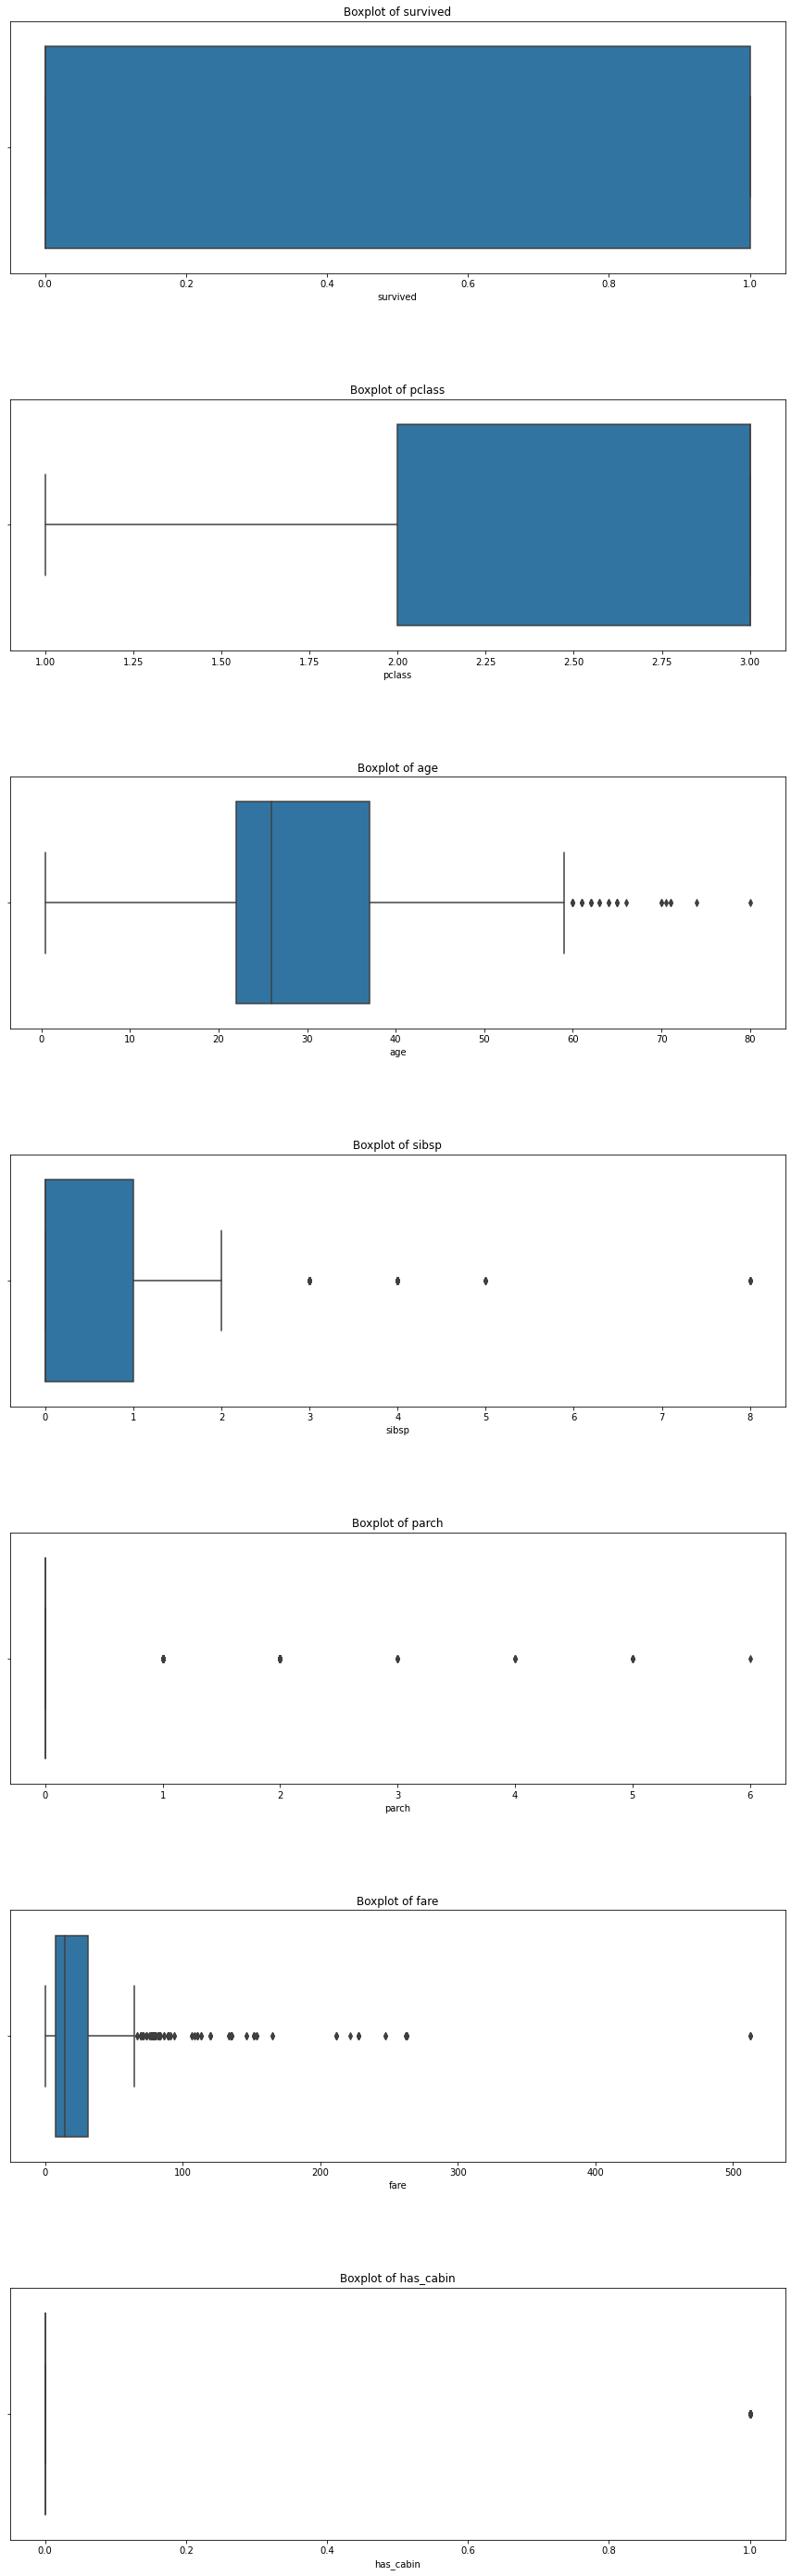

In [16]:
# Check for Outliers

num_col = ['survived','pclass','age','sibsp','parch','fare','has_cabin']

fig,ax = plt.subplots(len(num_col), figsize=(15,50))
sns.set_style('whitegrid')

for i, col in enumerate(num_col):
  sns.boxplot(train[col], ax=ax[i])
  ax[i].set_title("Boxplot of {}".format(col))

plt.subplots_adjust(hspace=0.5)

In [17]:
train.shape

(891, 10)

The Original Dataset had **891 records and 12 columns**, 3 of the columns had null values.
For the **Age column**, the nulls were replaced by the **average age of each P_Class**. The passengers in each of the P_class had different average age and thus for each Passengers Class Group(P_Class), the null in Ages for that group was replaced by the average age of that group.

The **Cabin Column** was used to create a column that shows if a passenger had a cabin or not, then later dropped.The Nulls in **Embarked** were filled with mode

Two Columns were created:
1.   **Has_Cabin**, if the passenger had a cabin or not
2.   **Child_Adult**, to classify the children and adult passengers

The Dataset has outliers that will not be removed for now,the number of records in the dataset remain the same but the number of columns reduces to **10 columns**




In [18]:
# Export Cleaned dataset
train.to_csv('titanic.csv')

## 6. Exploratory Analysis

**Univariate Analysis**

In [19]:
# Load clean dataset

data = pd.read_csv('titanic.csv')

data.drop('Unnamed: 0',1,inplace=True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,has_cabin,child_adult
0,0,3,male,22.0,1,0,7.2500,S,0,Adult
1,1,1,female,38.0,1,0,71.2833,C,1,Adult
2,1,3,female,26.0,0,0,7.9250,S,0,Adult
3,1,1,female,35.0,1,0,53.1000,S,1,Adult
4,0,3,male,35.0,0,0,8.0500,S,0,Adult


([<matplotlib.axis.XTick at 0x7f4a0ba247f0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

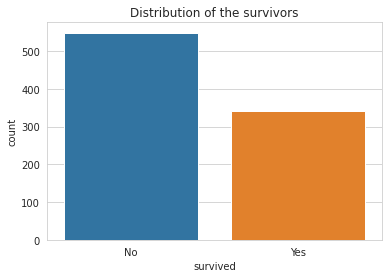

In [20]:
# Distribution of the survivors
sns.countplot(data['survived'])
plt.title('Distribution of the survivors')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

([<matplotlib.axis.XTick at 0x7f4a0b9f8048>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

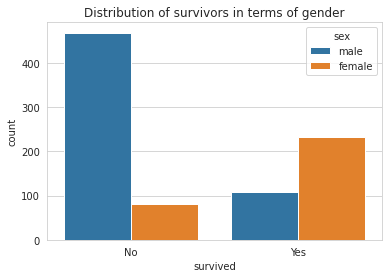

In [21]:
# Distribution of survivors in terms of gender
sns.countplot(data['survived'], hue= data['sex'])
plt.title('Distribution of survivors in terms of gender')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

([<matplotlib.axis.XTick at 0x7f4a0b9701d0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

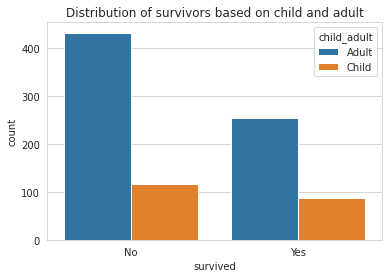

In [22]:
# Distribution of survivors based on child and adult
sns.countplot(data['survived'], hue=data['child_adult'])
plt.title('Distribution of survivors based on child and adult')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

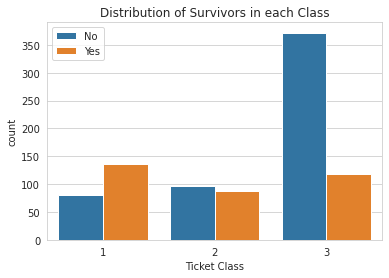

In [23]:
sns.countplot(data['pclass'], hue=data['survived'])
plt.title('Distribution of Survivors in each Class')
plt.xlabel('Ticket Class')
plt.legend(loc='upper left', labels=['No', 'Yes'])

Text(0.5, 0, 'Ticket Class')

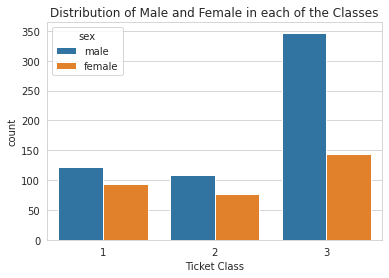

In [24]:
# Distribution of Male and Female in each of the Classes
sns.countplot(data['pclass'], hue=data['sex'])
plt.title('Distribution of Male and Female in each of the Classes')
plt.xlabel('Ticket Class')

Text(0.5, 0, 'Ticket Class')

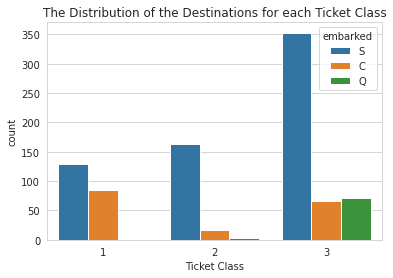

In [25]:
# The Distribution of the Destinations per each Class
sns.countplot(data['pclass'], hue=data['embarked'])
plt.title('The Distribution of the Destinations for each Ticket Class')
plt.xlabel('Ticket Class')

Text(0.5, 0, 'Ticket Class')

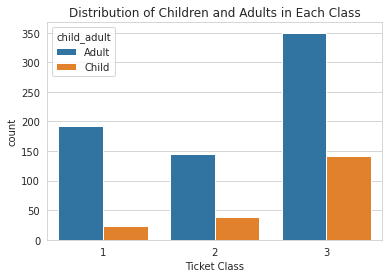

In [26]:
# Children and Adults in each Class
sns.countplot(data['pclass'], hue=data['child_adult'])
plt.title("Distribution of Children and Adults in Each Class")
plt.xlabel("Ticket Class")

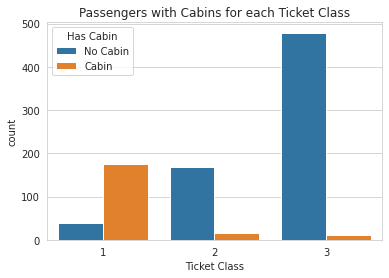

In [27]:
# Passengers with Cabin in each Class
sns.countplot(data['pclass'], hue= data['has_cabin'])
plt.title("Passengers with Cabins for each Ticket Class")
plt.xlabel('Ticket Class')
plt.legend(title='Has Cabin', loc='upper left', labels=['No Cabin', 'Cabin'])


Text(0.5, 0, 'Siblings/Spouse')

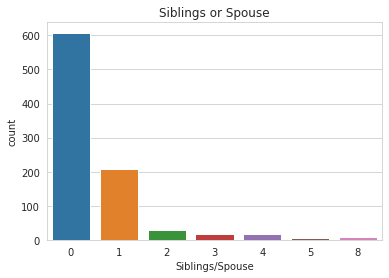

In [28]:
sns.countplot(data['sibsp'])
plt.title("Siblings or Spouse")
plt.xlabel('Siblings/Spouse')

Text(0.5, 0, 'Parent/Child')

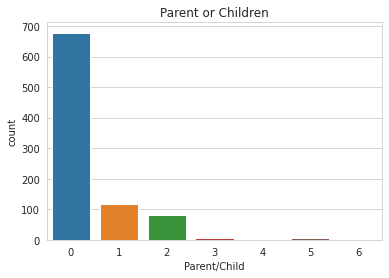

In [29]:
sns.countplot(data['parch'])
plt.title("Parent or Children")
plt.xlabel('Parent/Child')

In [30]:
cat = ['child_adult','embarked','sex']

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in cat:
  data[i] = en.fit_transform(data[i])

In [31]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,has_cabin,child_adult
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,0


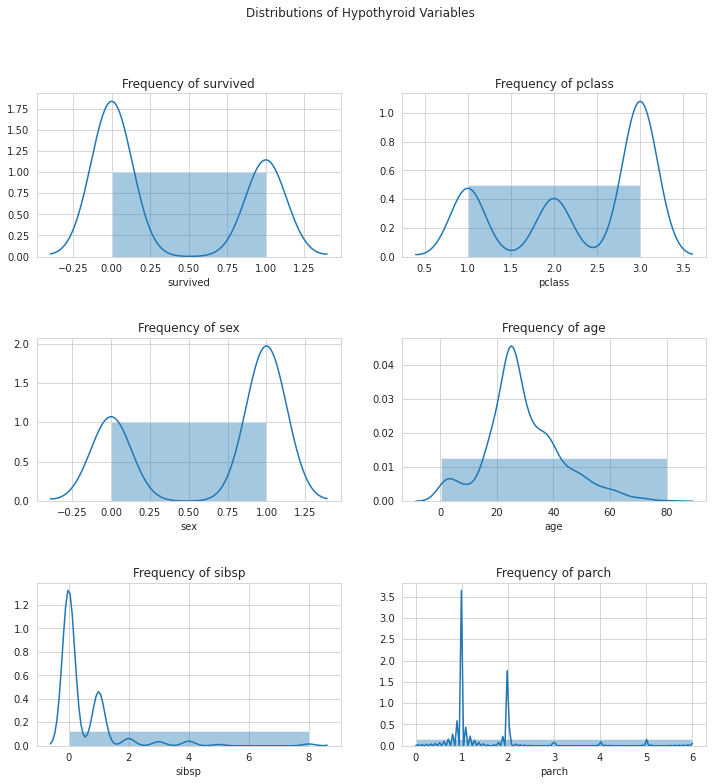

In [32]:
# Frequency distribution

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Hypothyroid Variables')

for ax, values, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(data.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

From the Analysis we saw that more passengers dies than survived, looking deeper we see that more males do not survive compared to females

More Adults died than survived,although there were still more adults who survived than children but in general the number of adults was higher than that of children, children in this case being younger than 21 years
Considering this it means more children survived in terms of percentage compared to adults

The most population had the the 3rd class ticket, where we see most of the passengers did not survive.The passengers with 1st class tickets had more survivors compared to the other 3 classess

The 3rd Class passengers were to embarked in all the three ports 
1.  C =Cherbourg, 
2.  Q = Queenstown, 
3.  S = Southampton

The most popular destination for most passengers in all the three classes was Southhampton
Most of the 3rd class passengers did not have a cabin, 1st class passengers had cabins

The highest number of siblings or spouse was 8 whose frequency was very low, most people had no siblings or spouses
For parents or children, highest recorded number was 6 but very few people had this many parents or children.
Most of the passengers did not have parents or children

**Bivariate Analysis**

In [33]:
data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,has_cabin,child_adult
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.292875,0.523008,0.381594,32.204208,1.536476,0.228956,0.228956
std,0.486592,0.836071,0.477990,13.210527,1.102743,0.806057,49.693429,0.791503,0.420397,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000


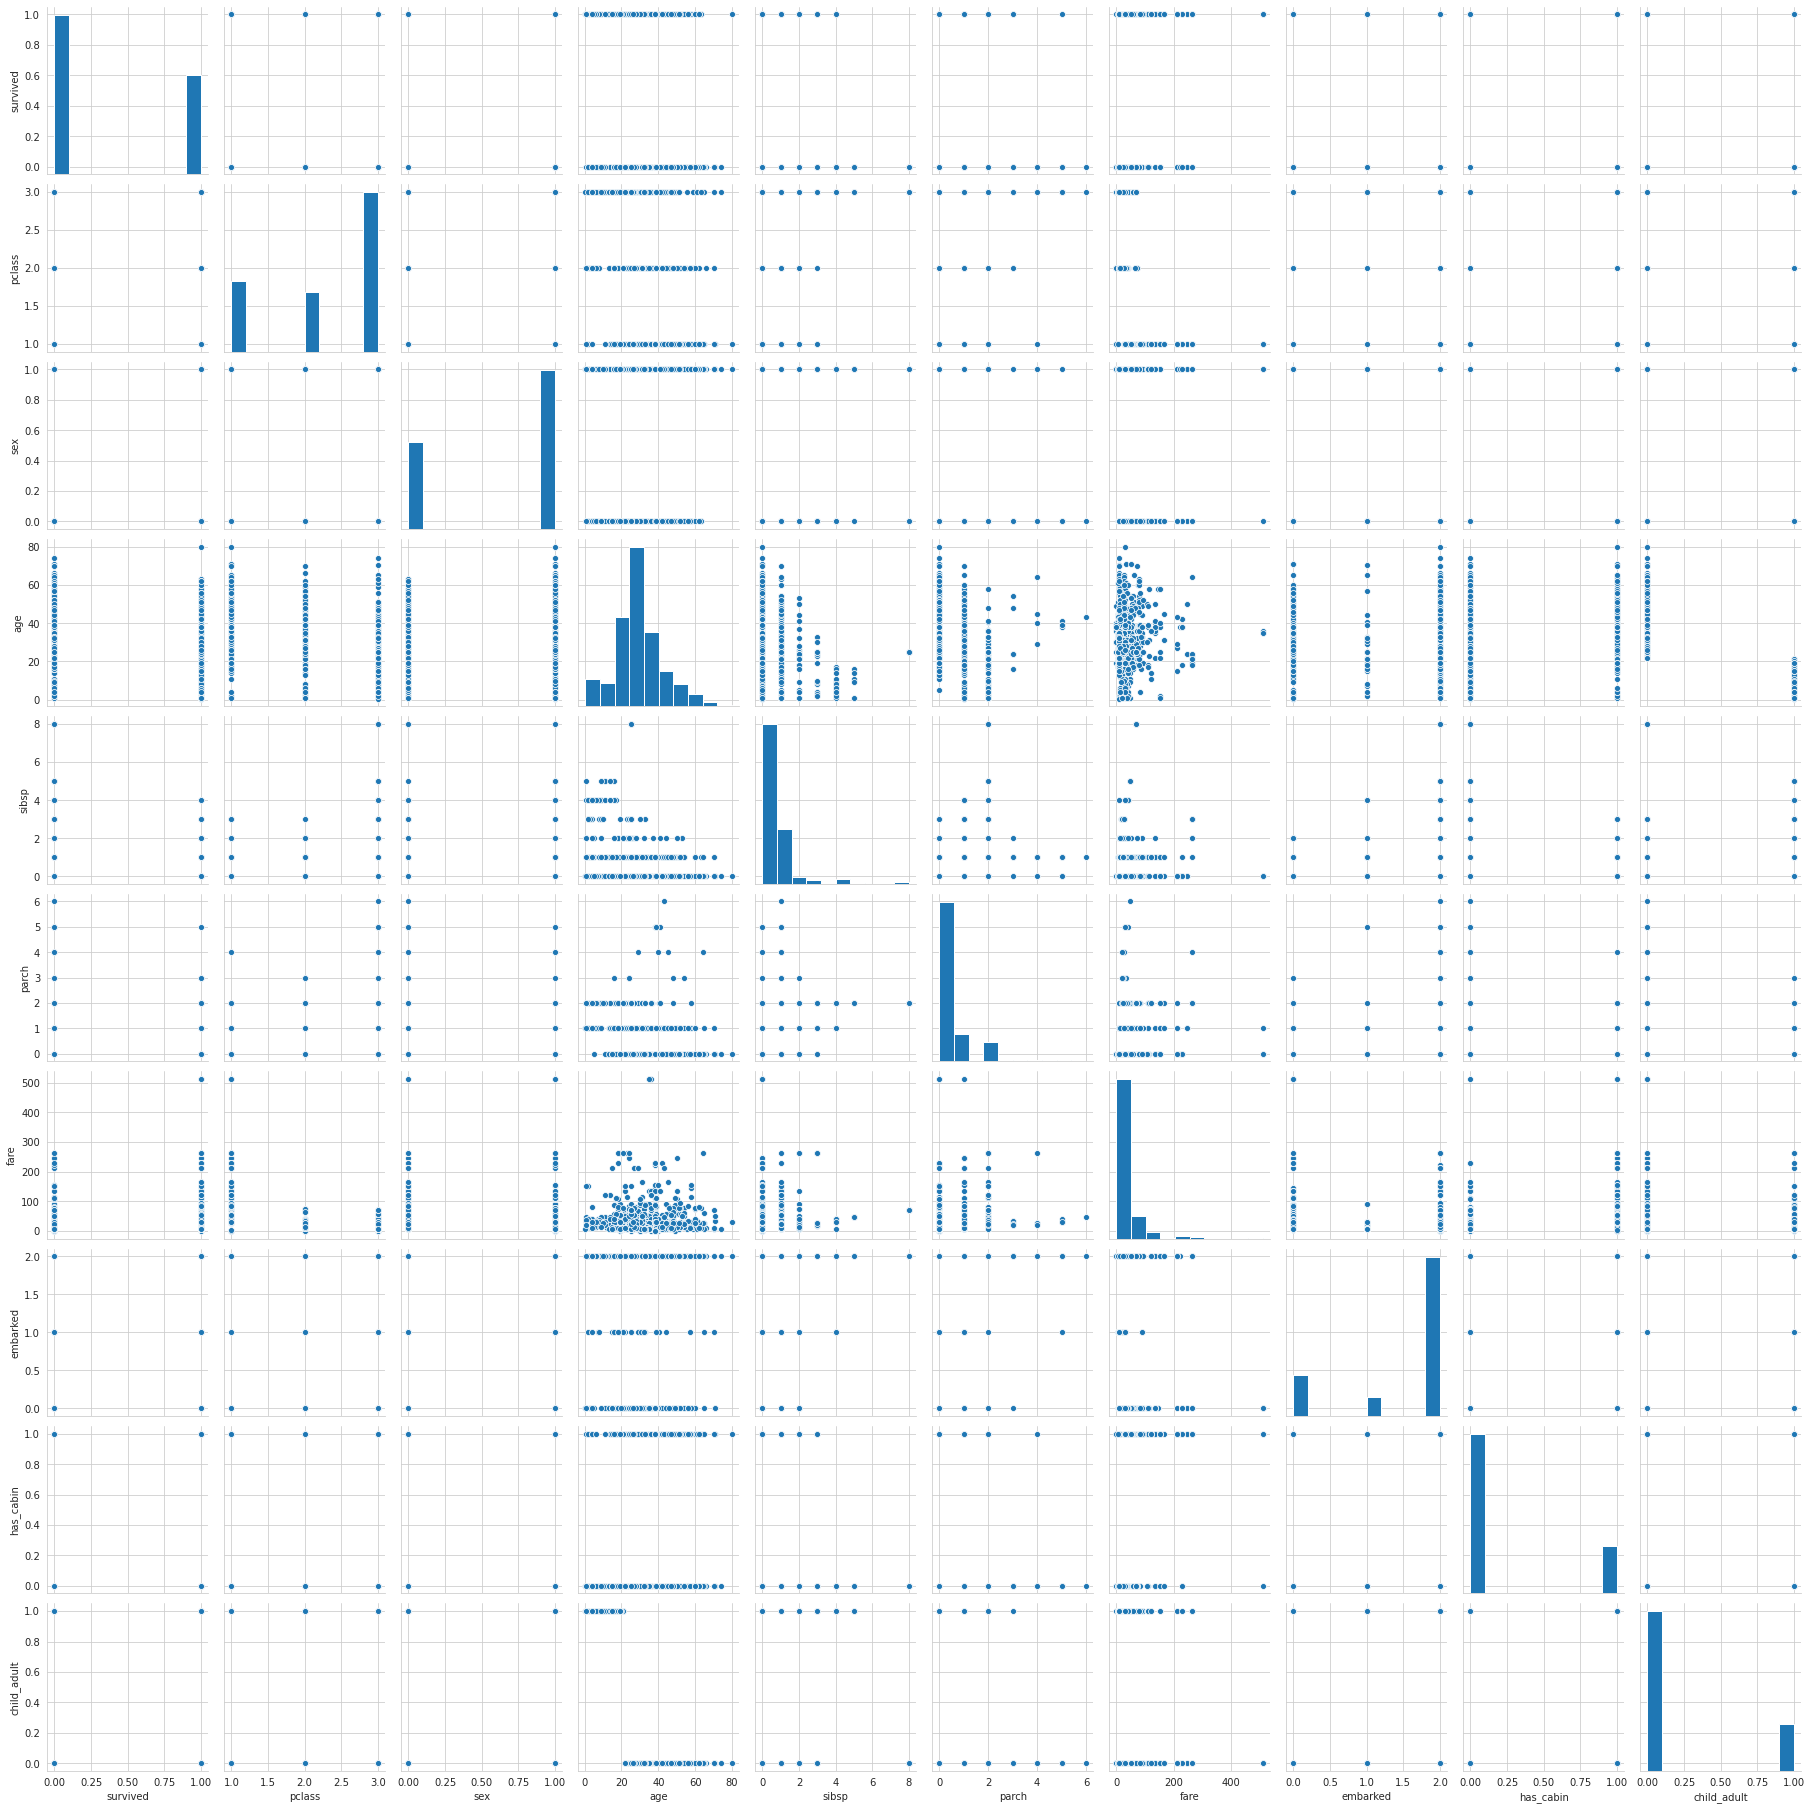

In [34]:
sns.pairplot(data)

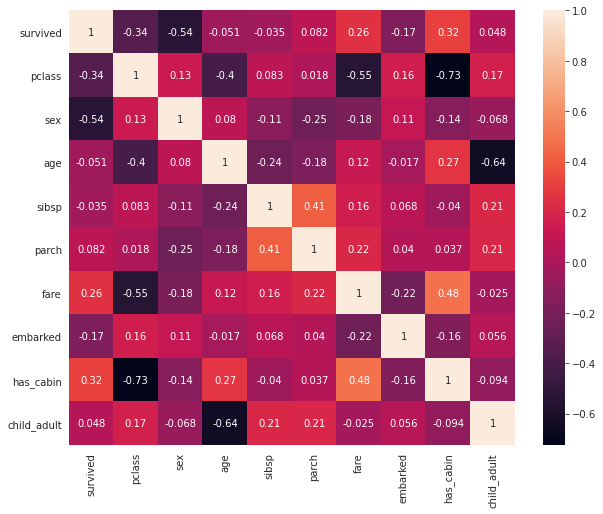

In [35]:
plt.figure(figsize=(10,8))         
sns.heatmap(data.corr(), annot=True,)

From the Analysis we see that most of our data although numerical it is categorical in nature. Thus most the columns do not have linear relationships except for age and fare as we see i our scatter plot

However the columns are correlated to each other as we see in our heatmap. We see that **Pclass** has a strong correlation with **has_cabin and fare**

**Age** has a strong correlation between **child_adult**

**Survived** has weak correlation with **Has_cabin,Fare, Sex and Pclass**, which can be included to our features

## 7. Implementing the Solution

In [36]:
# Libraries to Implement the Solution
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import confusion_matrix, classification_report


In [37]:
#Split Features and Label into train and test
X = data.iloc[:,1:]
y = data['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
# Fit the Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)


In [39]:
#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[98 12]
 [30 39]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       110
           1       0.76      0.57      0.65        69

    accuracy                           0.77       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179



**Split 70 - 30**

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [41]:
# Fit the Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)


In [42]:
#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140  22]
 [ 53  53]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       162
           1       0.71      0.50      0.59       106

    accuracy                           0.72       268
   macro avg       0.72      0.68      0.69       268
weighted avg       0.72      0.72      0.71       268



**Split 60 -40**

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [44]:
# Fit the Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)

In [45]:
#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[174  42]
 [ 67  74]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       216
           1       0.64      0.52      0.58       141

    accuracy                           0.69       357
   macro avg       0.68      0.67      0.67       357
weighted avg       0.69      0.69      0.69       357



With the Split of Training Data and testing data at 80 - 20, we get an accuracy of 77% with K neighbors being 7

With the other splits, 70 - 30 attained an accuracy of 72% and the split 60-40 attained an accuracy of 69%

The Conclusion is the less the training data we have for KNN the worse the accuracy of the model, therefore the split 80-20 is best suited for this model

To improve the accuracy of the 80-20 split model, we will try to do feature scaling and perform LDA to see if the accuracy improves



**Model Optimization**

Use LDA

In [46]:
#Split Features and Label into train and test
X = data.iloc[:,1:]
y = data['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Perform LDA
lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

#Fit the Model
# Fit the Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100  10]
 [ 27  42]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.81      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



Use PCA

In [47]:
#Split Features and Label into train and test
X = data.iloc[:,1:]
y = data['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Perform PCA
pca = PCA(n_components = 8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_
print(explained_variance)

# Fit the Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[0.3402797  0.23329267 0.1664371  0.14233566 0.04667227 0.02563793
 0.01282813 0.01049633]
[[101   9]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



The Accuracy has improved from 77% to 79% when we use feature scaling and LDA, if you specify the number of components or you dont the accuracy remain the same in LDA

For PCA with 8 compponents, the accuracy improves to 82%. The most ideal way to improve accuracy is by using Feature Scaling and PCA

## 8. Challenging the solution

The highest achieved accuracy is 82% which good compared to our metric of success. The Model can be able to predicit if a passenger survived or not.


The Model can also be improved by looking into other distances and voting system used by the sklearn algorithm.
Also considering other classifiers like Logistic Regression, Naive Bayes or Decision Trees to see if accuracy will improve